# Introduction to Regression with Neural Networks in TensorFlow

In [30]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Creating data to view and fit

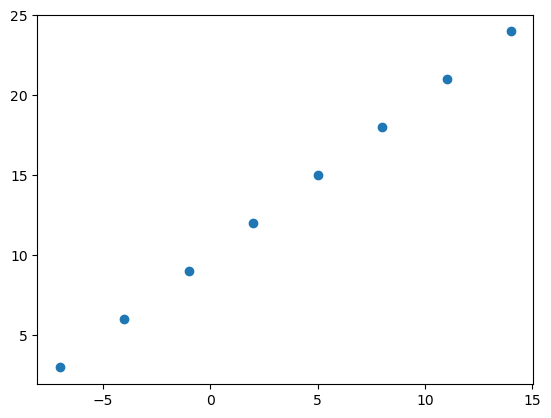

In [31]:
# Create features
x = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Görselleştirelim
plt.scatter(x, y)

In [32]:
y == x + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and output shapes

In [33]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
print(house_info)
print(house_price)

tf.Tensor([b'bedroom' b'bathroom' b'garage'], shape=(3,), dtype=string)
tf.Tensor([939700], shape=(1,), dtype=int32)


In [34]:
input_shape = x.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [35]:
# Turn our NumPy arrays into tensors
x = tf.constant(x)
y = tf.constant(y)
x, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [36]:
input_shape = x[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

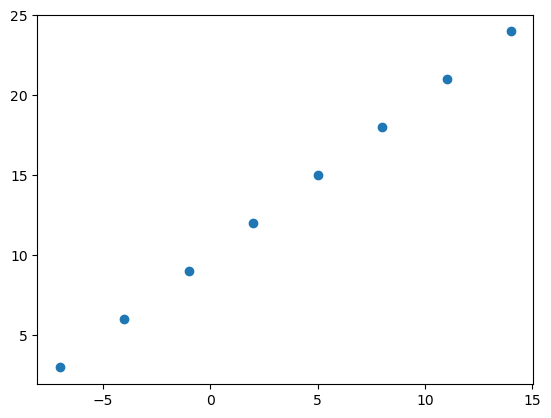

In [37]:
plt.scatter(x, y)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function and optimizer and evaluation metrics
3. **Fitting a model** - letting the model try to find patterns between x & y (features and labels)

In [38]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([ 
    tf.keras.layers.Dense(1) # Dense(1) dedik çünkü yukarıda input olarak 1 sayı veriyoruz ve output olarak 1 sayı alıyoruz 
])

''' Yukarıdaki kısmı bu şekilde de yapabiliriz. add() metodunu kullanarak ya da yukarıdaki gibi liste içinde direkt yazarak
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))
'''

# 2. Compile the module
# MAE, her bir veri noktasının gerçek değeri ile tahmin edilen değer arasındaki mutlak farkları alır, bu farkların toplamını alır ve son olarak tüm farkların ortalama değerini hesaplar.
model.compile(loss=tf.keras.losses.mae, # mae --> mean absolute error, ortalama mutlak hata
              optimizer=tf.keras.optimizers.SGD(), # SGD --> stochastic gradient descent, Stokastik gradyan inişi. optimizer="sgd" şeklinde de yazılabiliyor
              metrics=["mae"]) 

# 3. Fit the model
model.fit(tf.expand_dims(x, axis=-1), y, epochs=5)


Epoch 1/5
1/1 [==============================] - 0s 267ms/step - loss: 7.5762 - mae: 7.5762
Epoch 2/5
1/1 [==============================] - 0s 6ms/step - loss: 7.4925 - mae: 7.4925
Epoch 3/5
1/1 [==============================] - 0s 4ms/step - loss: 7.4869 - mae: 7.4869
Epoch 4/5
1/1 [==============================] - 0s 4ms/step - loss: 7.4813 - mae: 7.4813
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 7.4756 - mae: 7.4756


In [39]:
# Check out x and y
x, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [40]:
# Try and make prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 68ms/step


array([[29.407566]], dtype=float32)

## Improving our model

1. **Creating a model** - Here we might add more layers increase the number of hidden layers, change the activation function of each layer.
2. **Compiling a model** - Here we might change the optimizer function or perhaps the **learing rate** of the optimizer function.
3. **Fitting model** - Here we might fit a model for more **epochs** (leave it training for longer) or no more data (given the model more examples to learn from)   

In [41]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model
model.fit(tf.expand_dims(x, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 278ms/step - loss: 13.5102 - mae: 13.5102
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 13.3777 - mae: 13.3777
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 13.2452 - mae: 13.2452
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 13.1127 - mae: 13.1127
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 12.9802 - mae: 12.9802
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 12.8477 - mae: 12.8477
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 12.7152 - mae: 12.7152
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 12.5827 - mae: 12.5827
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 12.4502 - mae: 12.4502
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 12.3177 - mae: 12.3177
Epoch 11/100
1/1 [==============================] - 0s 4m

In [42]:
# Try and predict what y would be if x was 17.0
model.predict([17.0])

1/1 [==============================] - 0s 59ms/step


array([[29.977903]], dtype=float32)

## 300 nöronlu 3 yoğun katman
## 1 nöronlu 1 çıkış katmanı olan derin öğrenme modeli

**activation="relu"** ifadesi, katmanın nöron aktivasyon fonksiyonunu belirler. **"ReLU" kısaltması "Rectified Linear Unit"** anlamına gelir ve en yaygın kullanılan aktivasyon fonksiyonlarından biridir.

ReLU aktivasyon fonksiyonu, giriş değeri pozitifse aynı değeri, negatifse ise sıfırı döndürür. Matematiksel olarak, **f(x) = max(0, x)** şeklinde ifade edilir. Yani, negatif giriş değerleri sıfır olarak kabul edilirken, pozitif giriş değerleri aynen kullanılır.


In [44]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=["mae"])

model.fit(tf.expand_dims(x, axis=-1), y, epochs=1000)

model.save("my_model.h5")

Epoch 1/1000
1/1 [==============================] - 1s 845ms/step - loss: 13.6764 - mae: 13.6764
Epoch 2/1000
1/1 [==============================] - 0s 4ms/step - loss: 53.6389 - mae: 53.6389
Epoch 3/1000
1/1 [==============================] - 0s 4ms/step - loss: 13.2114 - mae: 13.2114
Epoch 4/1000
1/1 [==============================] - 0s 5ms/step - loss: 12.7476 - mae: 12.7476
Epoch 5/1000
1/1 [==============================] - 0s 6ms/step - loss: 10.3759 - mae: 10.3759
Epoch 6/1000
1/1 [==============================] - 0s 4ms/step - loss: 4.8240 - mae: 4.8240
Epoch 7/1000
1/1 [==============================] - 0s 5ms/step - loss: 4.7909 - mae: 4.7909
Epoch 8/1000
1/1 [==============================] - 0s 4ms/step - loss: 8.9034 - mae: 8.9034
Epoch 9/1000
1/1 [==============================] - 0s 6ms/step - loss: 8.3924 - mae: 8.3924
Epoch 10/1000
1/1 [==============================] - 0s 5ms/step - loss: 3.3580 - mae: 3.3580
Epoch 11/1000
1/1 [==============================] - 0s 6

C:\Users\LENOVO\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [45]:
model.predict([23.0])

1/1 [==============================] - 0s 290ms/step


array([[32.801315]], dtype=float32)

## Evaluating a model

Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...

In [46]:
# Make a bigger dataset
x = np.arange(-100, 100, 4)
x

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [47]:
# Make labels for the dataset
y = np.arange(-90, 110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [48]:
y = x + 10
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

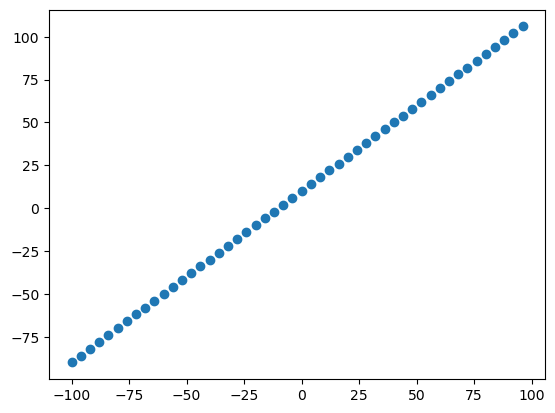

In [49]:
plt.scatter(x, y)

## Split data into training/test set

1. **Training set** - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).
2. **Validation set** - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).
3. **Test set** - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).

In [50]:
len(x)

50

In [51]:
# Split data into train and test sets
x_train = x[:40] # first 40 examples (80% of data)
y_train = y[:40]

x_test = x[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(x_train), len(x_test)

(40, 10)

## Visualizing the data

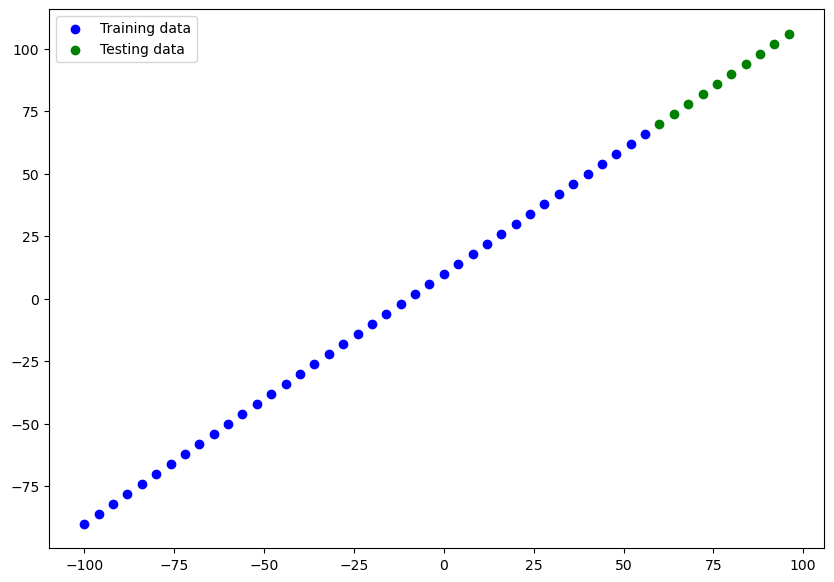

In [52]:
plt.figure(figsize=(10,7))

# Plot training data in blue
plt.scatter(x_train, y_train, c='b', label='Training data')

# Plot test data in green
plt.scatter(x_test, y_test, c='g', label='Testing data')

plt.legend()

In [53]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss='mae',
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
# model.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=100)

In [54]:
### Visualizing the model
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [55]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# Create a model
model